<a href="https://colab.research.google.com/github/aymnblh/Machine-Learning/blob/main/Binary_Prediction_with_a_Rainfall_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv("/content/train.csv",sep = ',')
data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [28]:
dataTest=pd.read_csv("/content/test.csv",sep = ',')
dataTest.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [29]:
data.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [30]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [31]:
dataTest['winddirection'].interpolate(method='linear', inplace=True)

<ipython-input-31-05b8853501b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataTest['winddirection'].interpolate(method='linear', inplace=True)


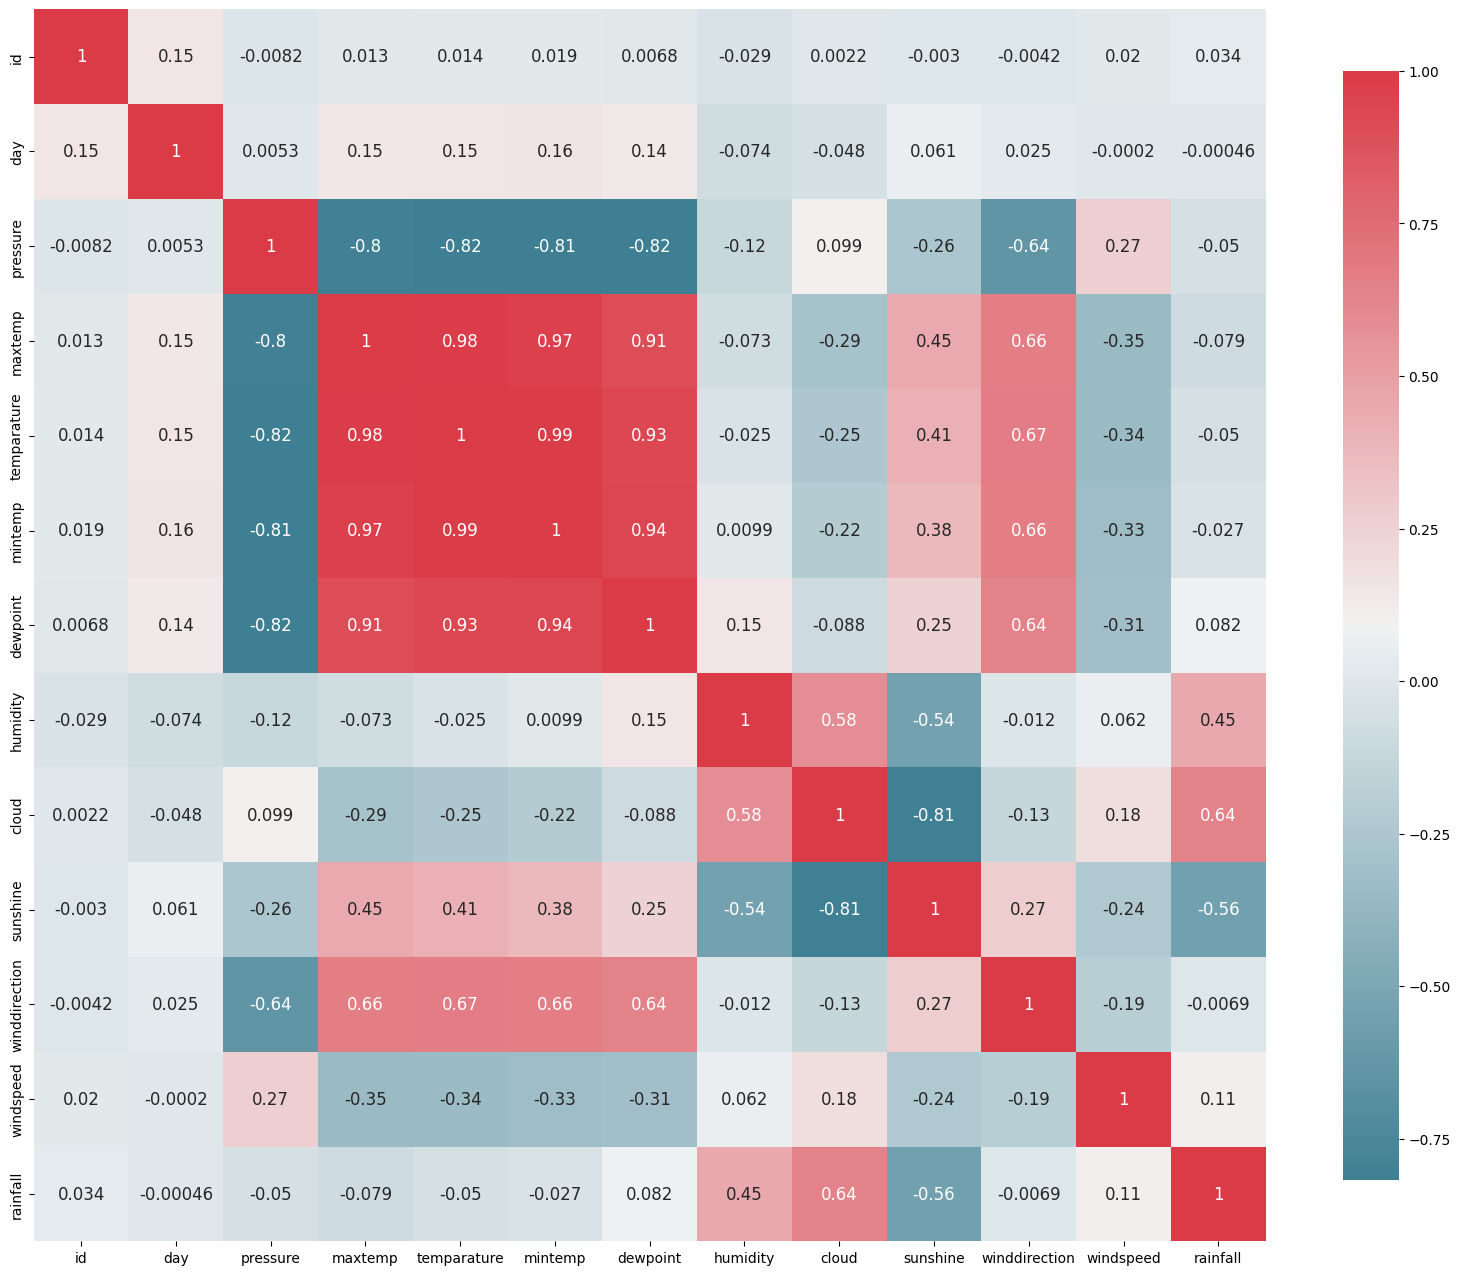

In [32]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 20 , 16 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap,

        square=True,

        cbar_kws={ 'shrink' : .9 },

        ax=ax,

        annot = True,

        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(data)

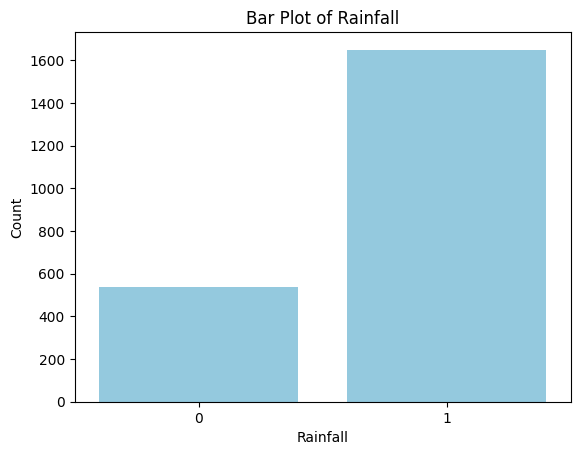

In [33]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rainfall', data=data, color='skyblue')

plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.title('Bar Plot of Rainfall')

plt.show()


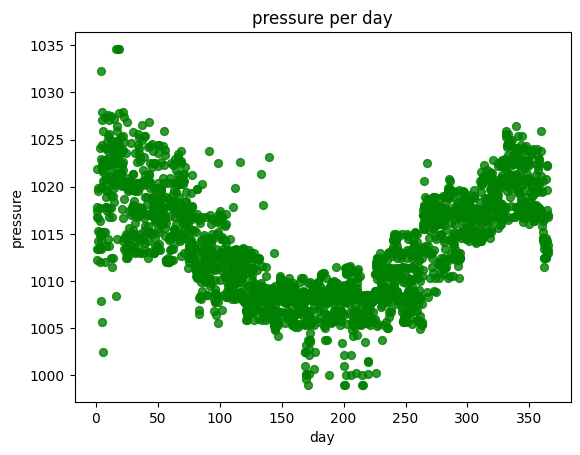

In [34]:
data.plot(kind='scatter', x='day', y='pressure', s=32, alpha=.8, color='green', title='pressure per day')
plt.show()

<ipython-input-35-e47b232dc4e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["pressure"],bins=10,hist=True,kde=True,color='red')


<Axes: xlabel='pressure', ylabel='Density'>

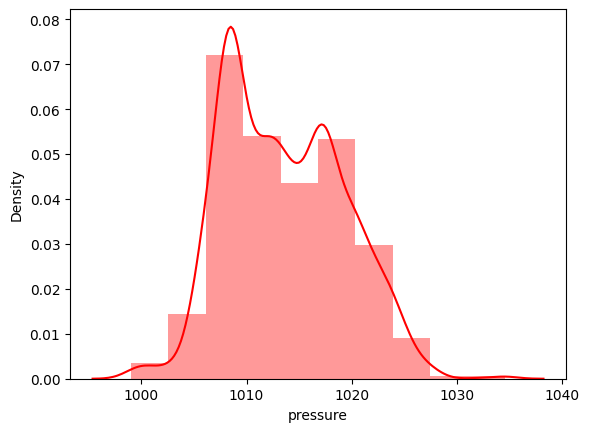

In [35]:
sns.distplot(data["pressure"],bins=10,hist=True,kde=True,color='red')

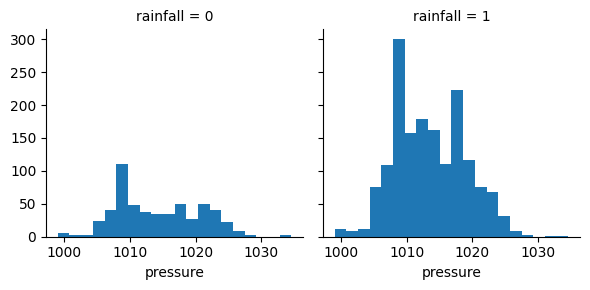

In [36]:
cor=sns.FacetGrid(data,col='rainfall')
cor.map(plt.hist,'pressure',bins=20)

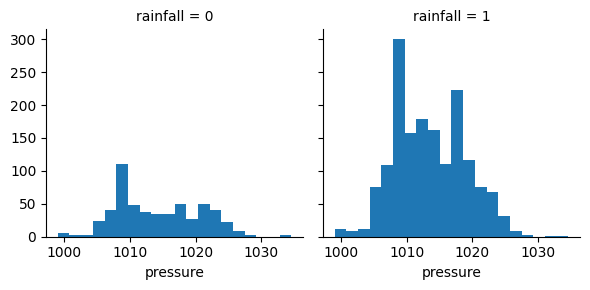

In [37]:
cor=sns.FacetGrid(data,col='rainfall')
cor.map(plt.hist,'pressure',bins=20)

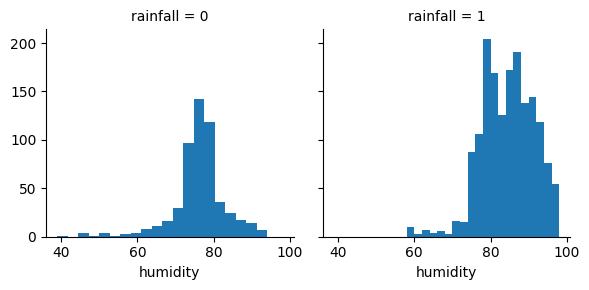

In [38]:
cor=sns.FacetGrid(data,col='rainfall')
cor.map(plt.hist,'humidity',bins=20)

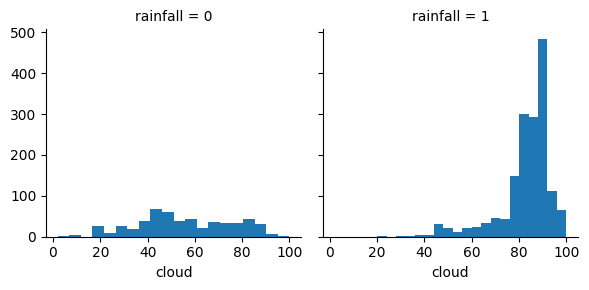

In [39]:
cor=sns.FacetGrid(data,col='rainfall')
cor.map(plt.hist,'cloud',bins=20)

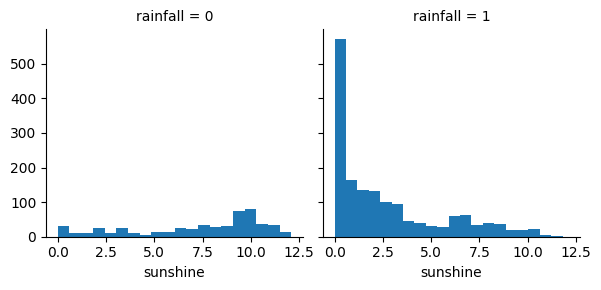

In [40]:
cor=sns.FacetGrid(data,col='rainfall')
cor.map(plt.hist,'sunshine',bins=20)

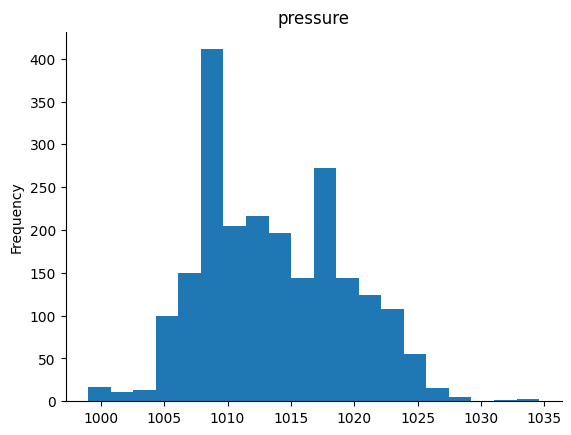

In [41]:
data['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

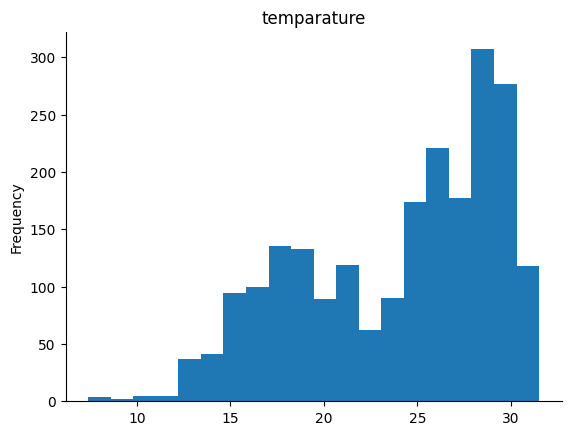

In [42]:

data['temparature'].plot(kind='hist', bins=20, title='temparature')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

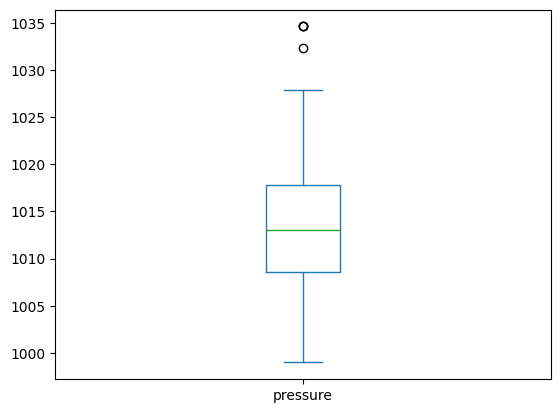

In [43]:
data["pressure"].plot.box()

<Axes: >

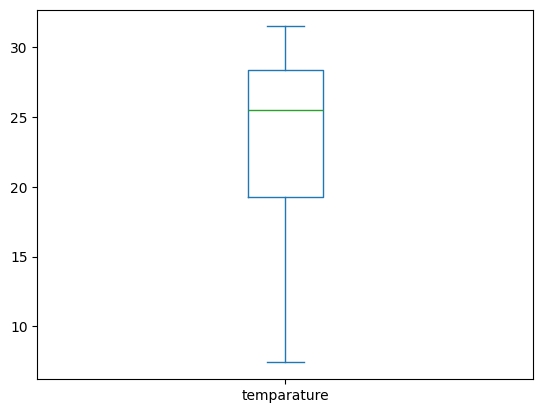

In [44]:
data["temparature"].plot.box()

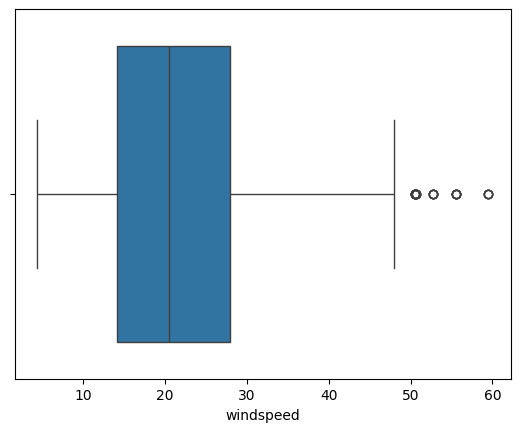

In [45]:
sns.boxplot(x=data["windspeed"])
plt.show()

<ipython-input-46-39a017613ca7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index("day").resample("M").mean().plot(figsize=(12, 6))


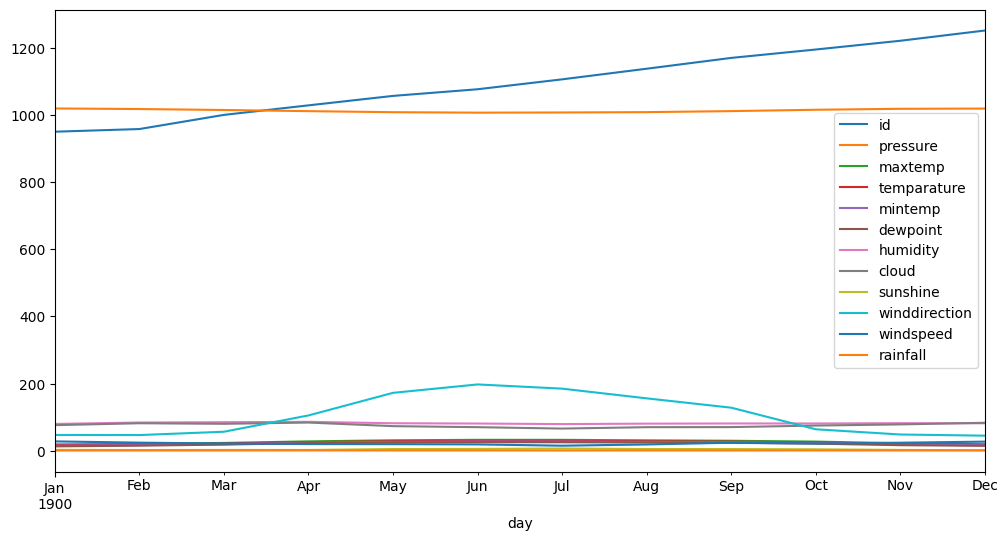

In [46]:
data["day"] = pd.to_datetime(data["day"], format="%j")  # If day is in day-of-year format
data.set_index("day").resample("M").mean().plot(figsize=(12, 6))
plt.show()

This function trains a Random Forest Classifier on a dataset for binary rainfall prediction and identifies the most important features influencing the prediction. It then visualizes these feature importances using a bar plot.

**Why Random Forest?**

Random Forest was chosen because it:
✔ Captures complex relationships in weather data.

✔ Handles outliers & missing values better than most models.

✔ Ranks features to help understand which weather variables matter.

✔ Prevents overfitting, unlike single Decision Trees.

✔ Works well with small datasets without deep learning.

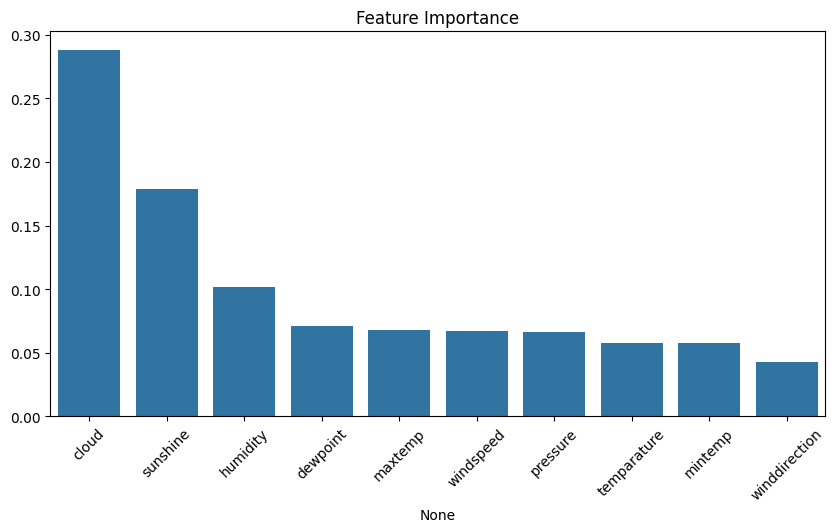

In [50]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = data.drop(columns=["rainfall", "id","day"])
y = data["rainfall"]

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()
